# PSO



In [12]:
! pip install deap mealpy opfunu numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mealpy.evolutionary_based import GA
from mealpy.swarm_based.PSO import OriginalPSO
from mealpy.swarm_based.ACOR import OriginalACOR
from mealpy import FloatVar
from opfunu.cec_based.cec2014 import F12014, F62014
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from scipy import stats
import pandas as pd
from tqdm import tqdm

Atividades

Aplique o algoritmoPSO, pode ser utilizado o framework do mealpy, conforme a documentacao a seguir para as mesmas funções a seguir. Compare o desempenho do algoritmo executando com as seguintes configurações de individuos e iterações




In [14]:
problem_size = 10  # 10 variáveis
bounds = [-100, 100]  # Intervalo das variáveis de [-100, 100]
c1 = c2 = 2.0
num_repeats = 30
w_max = 0.9
w_min = 0.4
phi = 0.5
alpha = 1
beta = 2

In [21]:
def train_model(model:str = "PSO", problem:str = "f6"):

    results = []
    configs = [
        {"name": "Config 1", "epoch": 500, "pop_size": 20},
        {"name": "Config 2", "epoch": 1000, "pop_size": 50},
        {"name": "Config 3", "epoch": 2000, "pop_size": 100}
    ]
    
    for config in configs:
        print(f"\nExecutando {config['name']}: Epoch={config['epoch']}, Pop_size={config['pop_size']}")
        
        main_problem = {}
        
        if problem == "f1":
            f1 = F12014(ndim=problem_size)
            problem_dict = {"obj_func": f1.evaluate}
        elif problem == "f6":
            f6 = F62014(ndim=problem_size)
            problem_dict = {"obj_func": f6.evaluate}
        else:
            return None
        
        metadata_dict = {
                "bounds": FloatVar(lb=[-100] * problem_size, ub=[100] * problem_size),
                "minmax": "min",
                "name": f"Config-{config['name']}",
                "verbose":True,
                "log_to": "console",
                "save_population": True,
                "max_early_stop": 200
        }
        
        main_problem.update(problem_dict)
        main_problem.update(metadata_dict)
        print(main_problem)
        
        algorithm = None
        if model == "GA":
            algorithm = GA.BaseGA(
                epoch=config['epoch'],
                pop_size=config['pop_size'],
                pc=0.95,  # Taxa de crossover padrão
                pm=0.025  # Taxa de mutação padrão
            )
        elif model == "PSO":
            algorithm = OriginalPSO(
                epoch=config["epoch"],
                pop_size=config["pop_size"],
                c1=c1,
                c2=c2,
                w_min=w_min,
                w_max=w_max
             )
        elif model == "ACO":
            algorithm = OriginalACOR(
                epoch=config["epoch"],
                pop_size=config["pop_size"],   
            )
        else:
            return None

        best_agent = algorithm.solve(main_problem)

        best_position = best_agent.solution
        best_fitness = best_agent.target.fitness

        main_path = f"results/{model}/{problem}"
        algorithm.history.save_global_objectives_chart(filename=f"{main_path}/goc")
        algorithm.history.save_local_objectives_chart(filename=f"{main_path}/loc")
        algorithm.history.save_global_best_fitness_chart(filename=f"{main_path}/gbfc")
        algorithm.history.save_local_best_fitness_chart(filename=f"{main_path}/lbfc")
        algorithm.history.save_runtime_chart(filename=f"{main_path}/rtc")
        algorithm.history.save_exploration_exploitation_chart(filename=f"{main_path}/eec")
        algorithm.history.save_diversity_chart(filename=f"{main_path}/dc")
        algorithm.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename=f"{main_path}/tc")
        
        positions_history = None
        if hasattr(algorithm.history, 'list_population'):
            positions_history = algorithm.history.list_population
        
        
        print(f"\tMelhor fitness: {best_fitness}")
        print(f"\tMelhor posição: {best_position}")

        results.append({
            "config": config,
            "best_fitness": best_fitness,
            "best_position": best_position,
            "fitness_history": algorithm.history.list_global_best_fit,
            "exploration_history": algorithm.history.list_exploration,
            "exploitation_history": algorithm.history.list_exploitation,
            "positions_history": positions_history  # Add positions history to results
        })
    
    return results

In [22]:
def plot_results(results, algo_name: str = "PSO", function_name = "f6"):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    for result in results:
        plt.plot(result["fitness_history"],
                label=f"{result['config']['name']} (Best: {result['best_fitness']:.4f})")

    plt.title(f'Evolução do Fitness Global - {algo_name} - {function_name}')
    plt.xlabel('Iterações')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    for result in results:
        plt.plot(result["exploration_history"],
                label=f"{result['config']['name']} - Exploration")
        plt.plot(result["exploitation_history"],
                linestyle='--',
                label=f"{result['config']['name']} - Exploitation")

    plt.title(f'Exploração vs Exploitação - {algo_name} - {function_name}')
    plt.xlabel('Iterações')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'results/resultados_comparacao_{algo_name}_{function_name}.png', dpi=300)
    plt.show()

    print("\nComparação de resultados:")
    for result in results:
        print(f"{result['config']['name']} - Epoch: {result['config']['epoch']}, Pop_size: {result['config']['pop_size']}")
        print(f"  Melhor fitness: {result['best_fitness']}")
        print(f"  Razão média Exploration/Exploitation: {np.mean(result['exploration_history'])/np.mean(result['exploitation_history']):.4f}")

A primeira função é a Rotated High Conditioned Elliptic Function.

![Rotated High Conditioned Elliptic Function](../images/high-conditioned-elliptic-function.png)

Segunda função é a F6 - Shifted and Rotated Weierstrass Function. Essa é uma função chamada de multimodal, onde existem muitos picos.

![Wierstrass Function](../images/weierstrass-function.png)


2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.ACOR.OriginalACOR: Solving single objective optimization problem.


2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 185349885.79313368, Global best: 185349885.79313368, Runtime: 0.00231 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 2, Current best: 185349885.79313368, Global best: 185349885.79313368, Runtime: 0.00226 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 3, Current best: 185349885.79313368, Global best: 185349885.79313368, Runtime: 0.00325 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 4, Current best: 185349885.79313368, Global best: 185349885.79313368, Runtime: 0.00265 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoc


Analyzing ACO on f1
Running ACO on f1...

Executando Config 1: Epoch=500, Pop_size=20
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x0000025B21CA1950>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B1D17F1D0>, 'minmax': 'min', 'name': 'Config-Config 1', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}
Error running ACO: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.
Falling back to PSO...

Executando Config 1: Epoch=500, Pop_size=20
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x0000025B1D0EA8A0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B1CBDBA70>, 'minmax': 'min', 'name': 'Config-Config 1', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 61, Current best: 8059538.250684417, Global best: 8059538.250684417, Runtime: 0.00207 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 62, Current best: 8059111.656329395, Global best: 8059111.656329395, Runtime: 0.00202 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 63, Current best: 8058933.002695387, Global best: 8058933.002695387, Runtime: 0.01477 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 64, Current best: 8058631.839162934, Global best: 8058631.839162934, Runtime: 0.00480 seconds
2025/05/15 10:35:17 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 65, Current best: 8058511.437969497, Global best: 8058511.437969497, Runtime: 0.00399 seconds
2025/05/15 10:35:17 

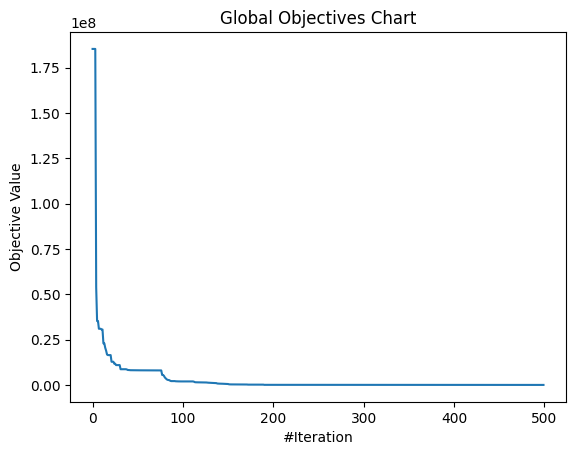

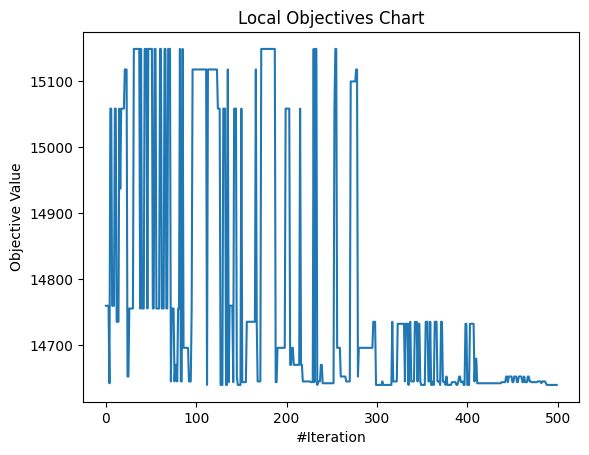

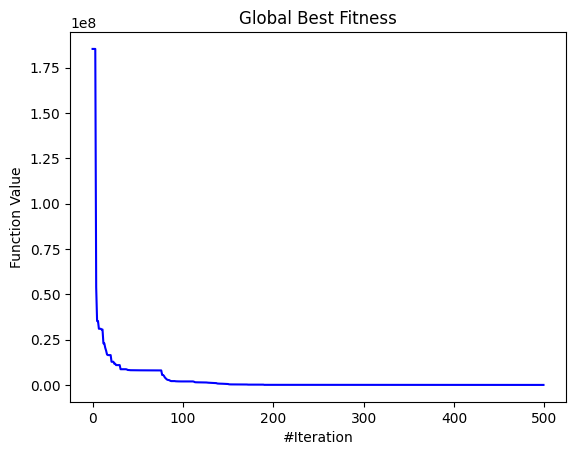

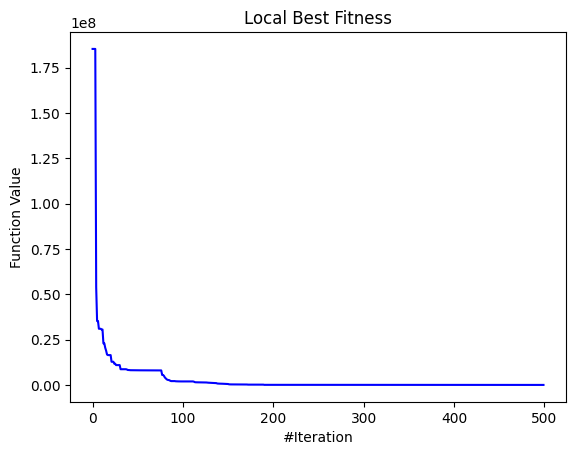

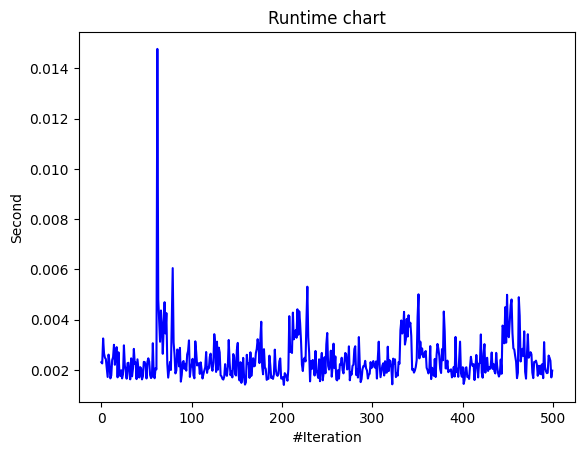

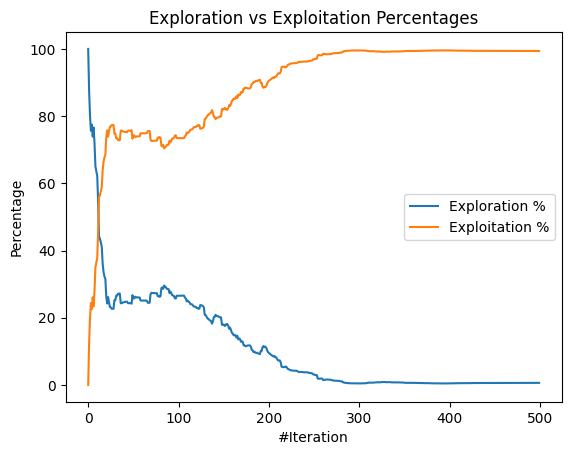

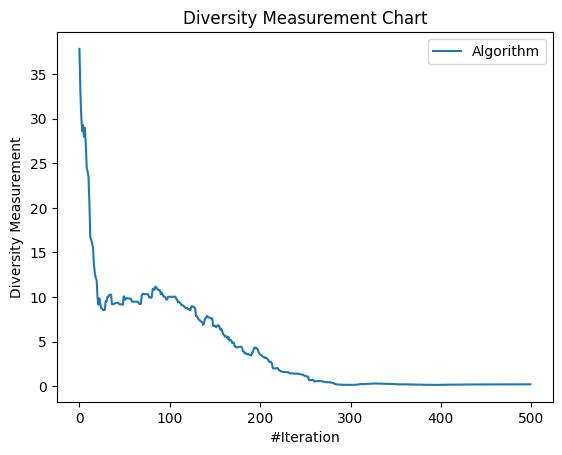

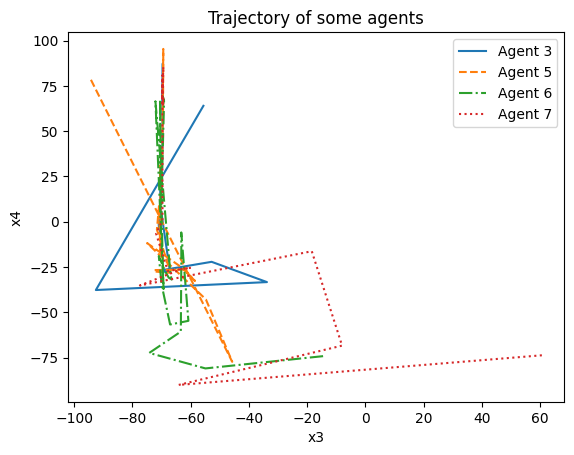

2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 1, Current best: 82161790.65321979, Global best: 82161790.65321979, Runtime: 0.00366 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 2, Current best: 82161790.65321979, Global best: 82161790.65321979, Runtime: 0.00462 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 3, Current best: 82161790.65321979, Global best: 82161790.65321979, Runtime: 0.00641 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 4, Current best: 82161790.65321979, Global best: 82161790.65321979, Runtime: 0.00574 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 5, Cu

	Melhor fitness: 14639.141834235019
	Melhor posição: [ 43.49832438  65.17170258 -69.47906327  66.60841682  22.68518556
 -98.1496842  -33.69424748  -3.71722617  66.62146961  42.7241218 ]

Executando Config 2: Epoch=1000, Pop_size=50
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x0000025B22D309B0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B22F2EE90>, 'minmax': 'min', 'name': 'Config-Config 2', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 32, Current best: 6587148.676856514, Global best: 6587148.676856514, Runtime: 0.00461 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 33, Current best: 6586122.0755883, Global best: 6586122.0755883, Runtime: 0.00631 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 34, Current best: 6537765.925084631, Global best: 6537765.925084631, Runtime: 0.00550 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 35, Current best: 6440131.161732866, Global best: 6440131.161732866, Runtime: 0.00510 seconds
2025/05/15 10:35:21 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 36, Current best: 6419099.528745987, Global best: 6419099.528745987, Runtime: 0.00430 seconds
2025/05/15 10:35:21 AM, 

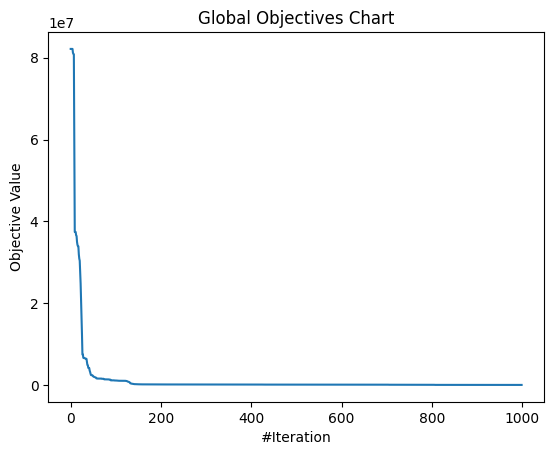

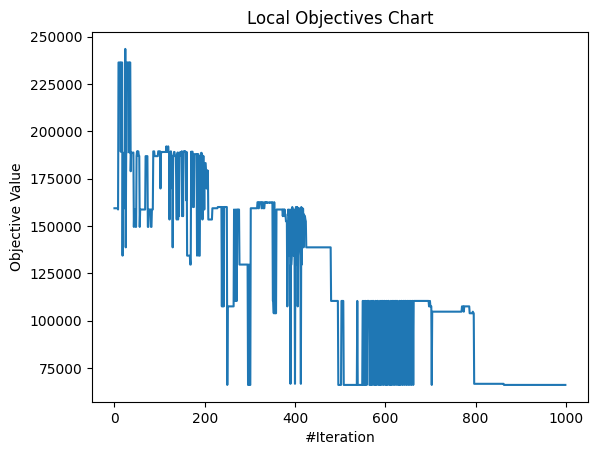

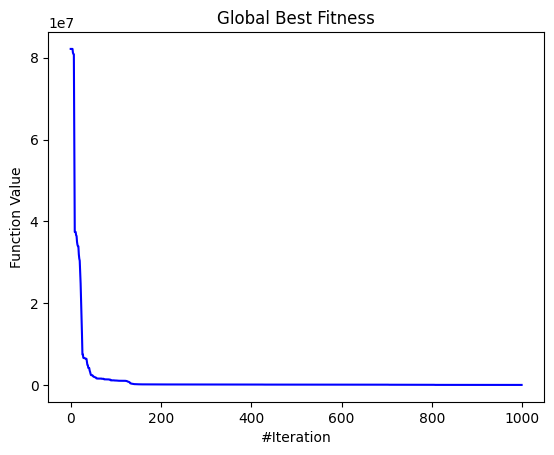

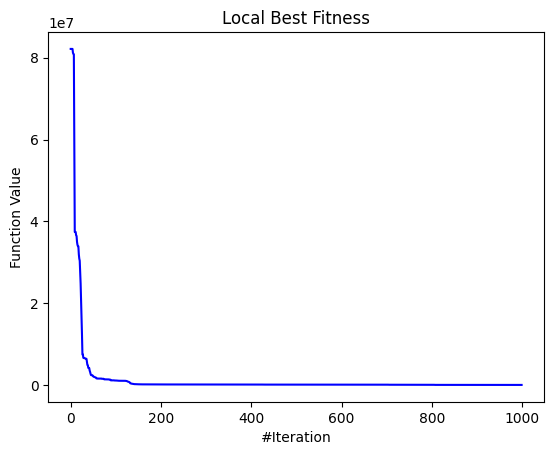

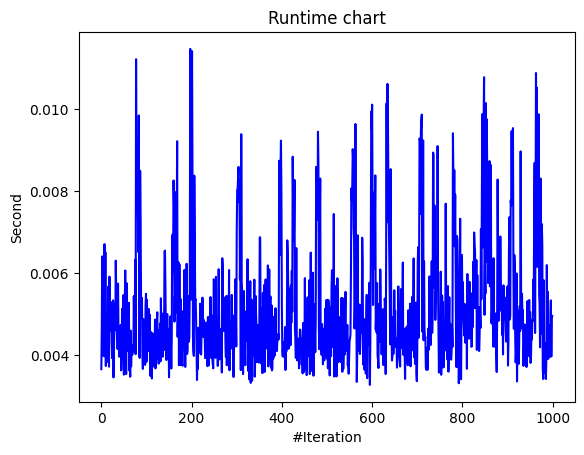

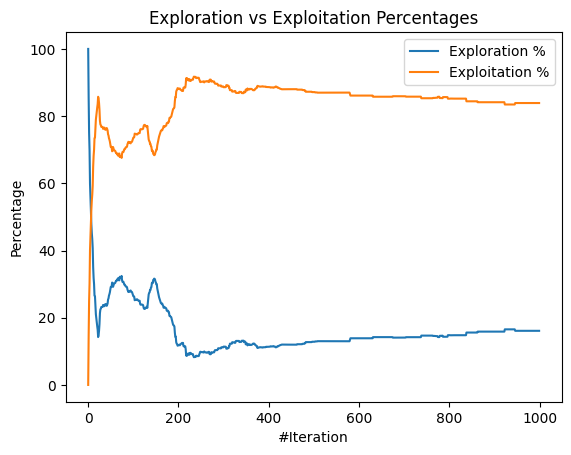

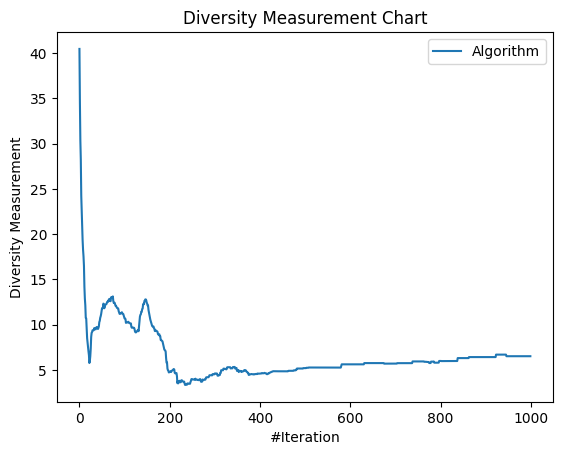

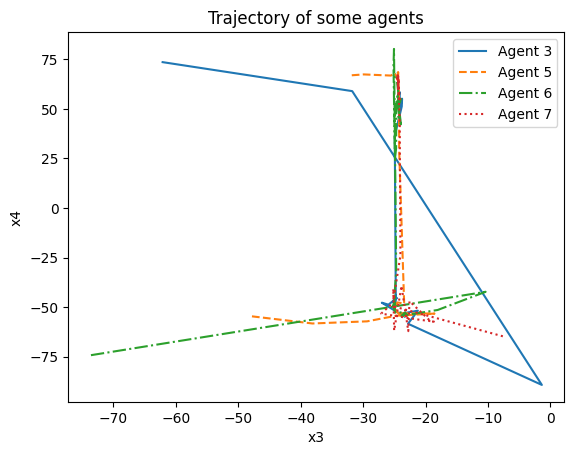

2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 1, Current best: 174585342.2150272, Global best: 174585342.2150272, Runtime: 0.00939 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 2, Current best: 70467159.91171412, Global best: 70467159.91171412, Runtime: 0.01034 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 3, Current best: 70467159.91171412, Global best: 70467159.91171412, Runtime: 0.00801 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 4, Current best: 17396114.85311502, Global best: 17396114.85311502, Runtime: 0.00871 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 5, Cu

	Melhor fitness: 65976.81266005899
	Melhor posição: [ 55.0098943   65.63175797 -53.09291279  68.08670813  34.7739566
 -39.81895857 -17.44739932  14.48272602  77.32856733  97.22846868]

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x0000025B2B587CB0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B22DF8A70>, 'minmax': 'min', 'name': 'Config-Config 3', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 18, Current best: 6647889.606674946, Global best: 6647889.606674946, Runtime: 0.01009 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 19, Current best: 4277586.5963988695, Global best: 4277586.5963988695, Runtime: 0.01002 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 20, Current best: 3995424.941680127, Global best: 3995424.941680127, Runtime: 0.00772 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 21, Current best: 2752755.015381147, Global best: 2752755.015381147, Runtime: 0.01071 seconds
2025/05/15 10:35:30 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 22, Current best: 2324192.9890159434, Global best: 2324192.9890159434, Runtime: 0.00983 seconds
2025/05/15 10:35

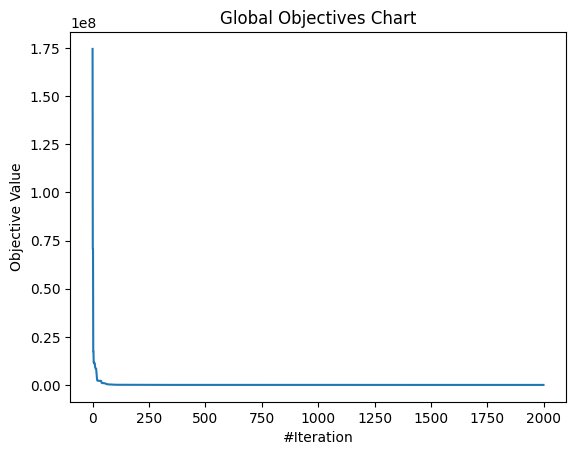

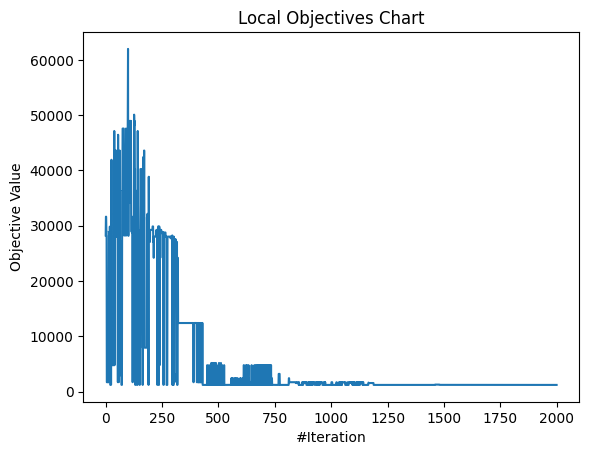

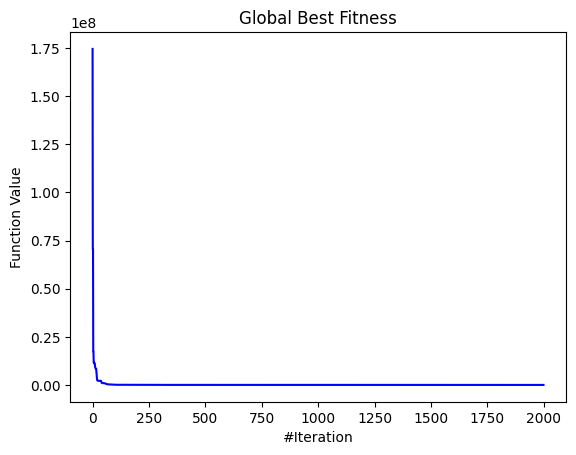

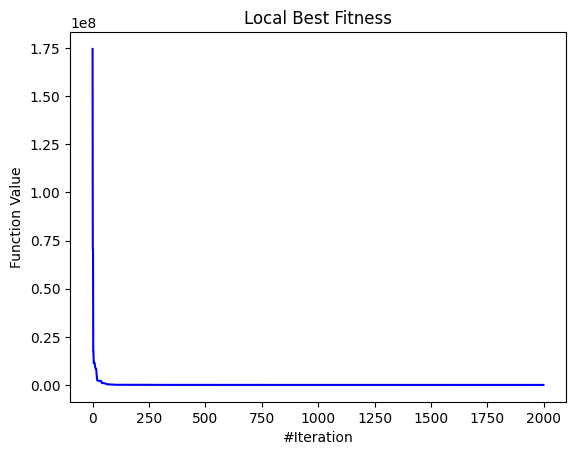

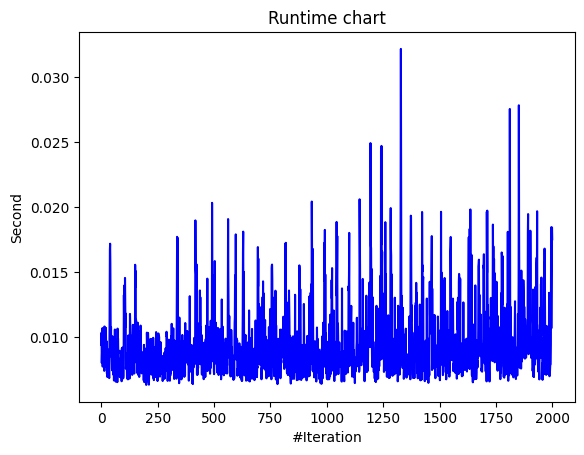

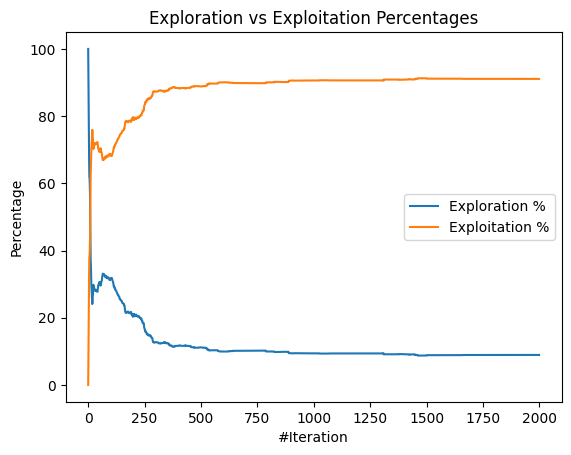

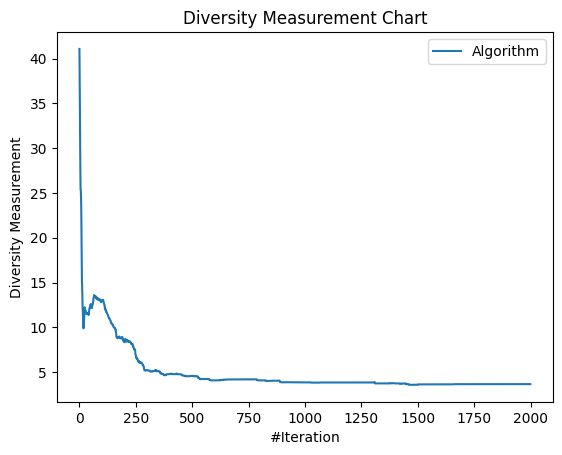

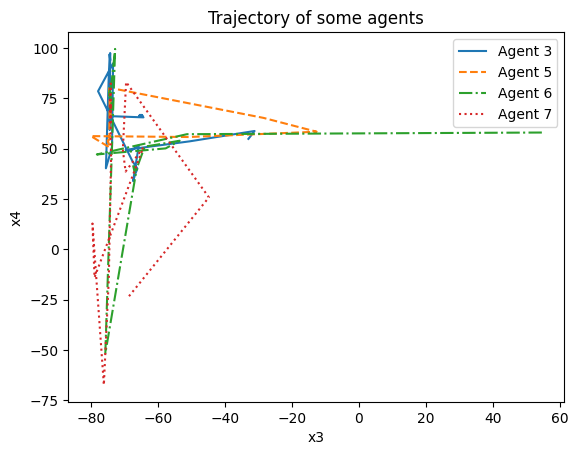

	Melhor fitness: 1208.9470149745177
	Melhor posição: [ 55.19240938  65.09952058 -59.92351414  66.59950957  22.67200301
 -40.83526664 -33.60163288   7.22339146  73.03873683  96.54561839]
Creating animation frames...
Error creating frame 0: 'Agent' object is not subscriptable
Error creating frame 16: 'Agent' object is not subscriptable
Error creating frame 32: 'Agent' object is not subscriptable
Error creating frame 48: 'Agent' object is not subscriptable
Error creating frame 64: 'Agent' object is not subscriptable
Error creating frame 80: 'Agent' object is not subscriptable
Error creating frame 96: 'Agent' object is not subscriptable
Error creating frame 112: 'Agent' object is not subscriptable
Error creating frame 128: 'Agent' object is not subscriptable
Error creating frame 144: 'Agent' object is not subscriptable
Error creating frame 160: 'Agent' object is not subscriptable
Error creating frame 176: 'Agent' object is not subscriptable
Error creating frame 192: 'Agent' object is not s

2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.ACOR.OriginalACOR: Solving single objective optimization problem.
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 615.3255927339476, Global best: 615.3255927339476, Runtime: 0.00656 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 2, Current best: 614.0646930870371, Global best: 614.0646930870371, Runtime: 0.00704 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 3, Current best: 613.7327906231823, Global best: 613.7327906231823, Runtime: 0.00774 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 4, Current best: 612.8848732261073, Global best: 612.8848732261073, Runtime: 0.00862 


Analyzing ACO on f6
Running ACO on f6...

Executando Config 1: Epoch=500, Pop_size=20
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x0000025B1CBB1B50>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B224296D0>, 'minmax': 'min', 'name': 'Config-Config 1', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}
Error running ACO: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.
Falling back to PSO...

Executando Config 1: Epoch=500, Pop_size=20
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x0000025B1D3AE4E0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B22429B50>, 'minmax': 'min', 'name': 'Config-Config 1', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 22, Current best: 605.7360339097548, Global best: 605.7360339097548, Runtime: 0.00794 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 23, Current best: 605.7360339097548, Global best: 605.7360339097548, Runtime: 0.00768 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 24, Current best: 605.7360339097548, Global best: 605.7360339097548, Runtime: 0.00729 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 25, Current best: 605.7360339097548, Global best: 605.7360339097548, Runtime: 0.00721 seconds
2025/05/15 10:35:57 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 26, Current best: 605.7360339097548, Global best: 605.7360339097548, Runtime: 0.00785 seconds
2025/05/15 10:35:57 

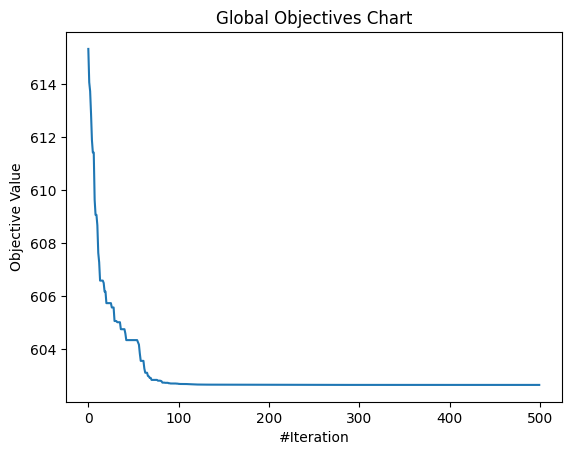

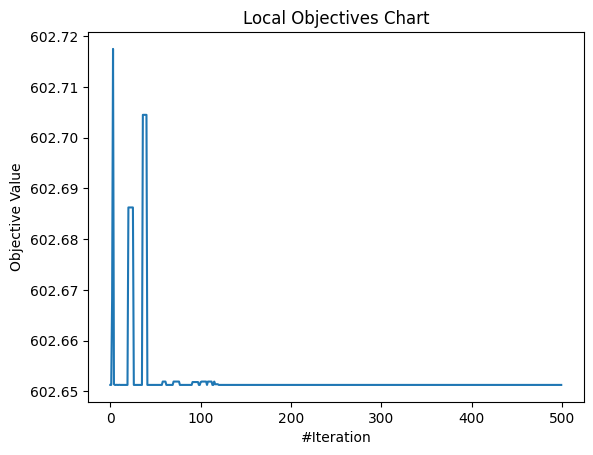

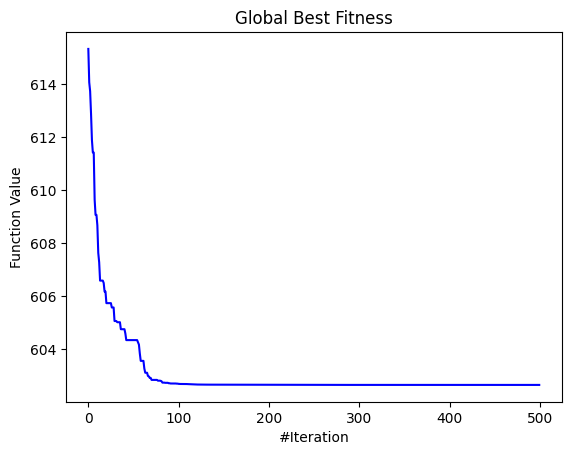

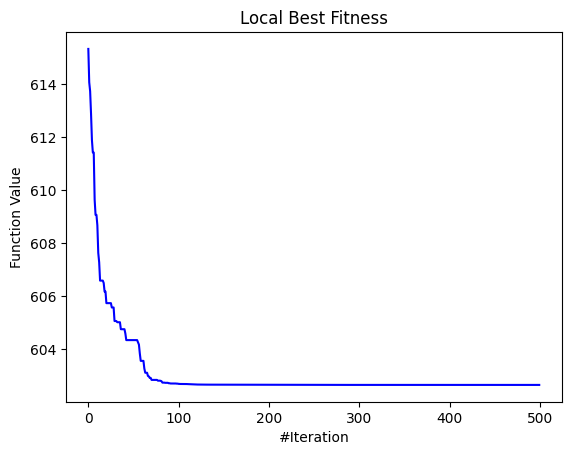

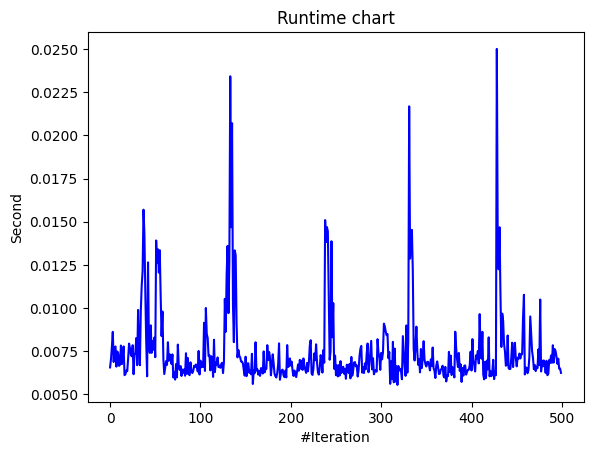

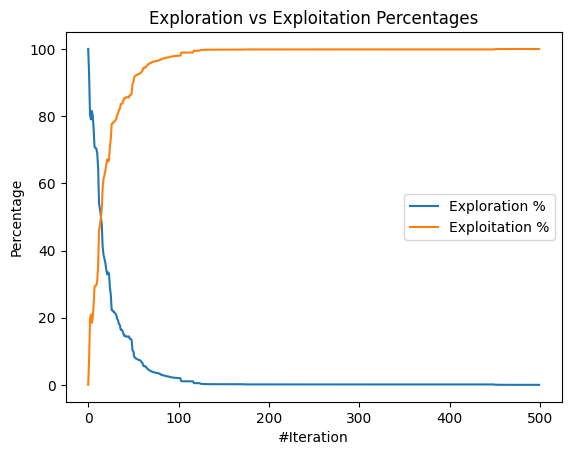

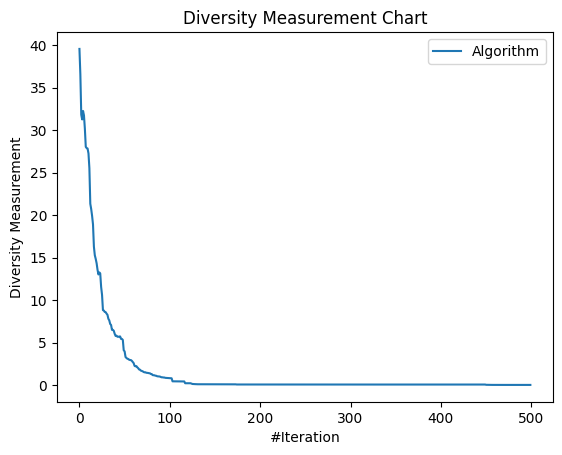

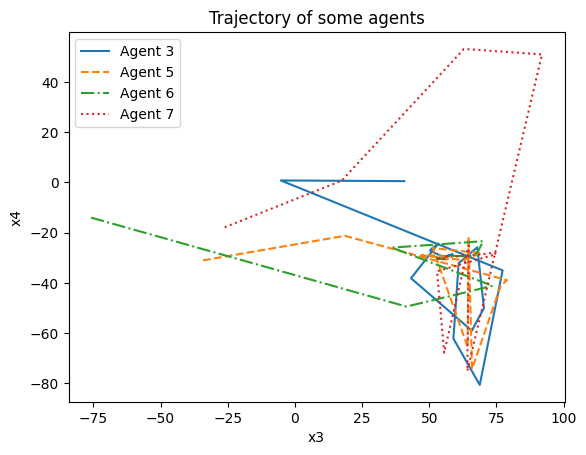

2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 1, Current best: 612.3497889986353, Global best: 612.3497889986353, Runtime: 0.01751 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 2, Current best: 612.2587167194401, Global best: 612.2587167194401, Runtime: 0.02213 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 3, Current best: 612.2587167194401, Global best: 612.2587167194401, Runtime: 0.01621 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 4, Current best: 609.47196180901, Global best: 609.47196180901, Runtime: 0.01500 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 5, Curren

	Melhor fitness: 602.6512725275255
	Melhor posição: [ 19.72085182   9.69656888  53.60555763 -30.3301587  -97.40576088
 -55.64445213  -1.62419155 -36.51702317   5.33827994  30.907022  ]

Executando Config 2: Epoch=1000, Pop_size=50
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x0000025B1C5B5B80>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B21402250>, 'minmax': 'min', 'name': 'Config-Config 2', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 10, Current best: 608.1819124812176, Global best: 608.1819124812176, Runtime: 0.02210 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 11, Current best: 607.5462312912796, Global best: 607.5462312912796, Runtime: 0.01956 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 12, Current best: 607.5462312912796, Global best: 607.5462312912796, Runtime: 0.01838 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 13, Current best: 607.5462312912796, Global best: 607.5462312912796, Runtime: 0.01770 seconds
2025/05/15 10:36:04 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 14, Current best: 607.5462312912796, Global best: 607.5462312912796, Runtime: 0.01758 seconds
2025/05/15 10:36:04 

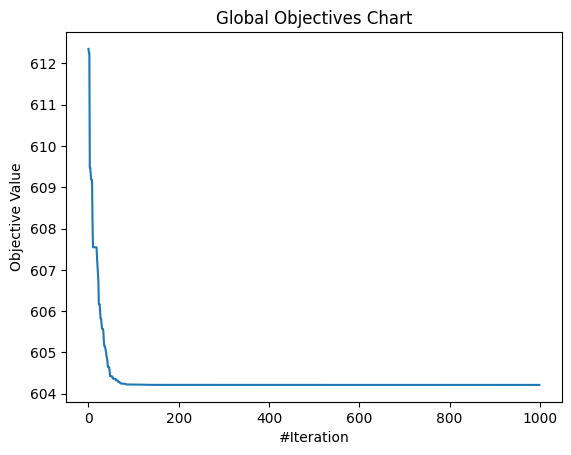

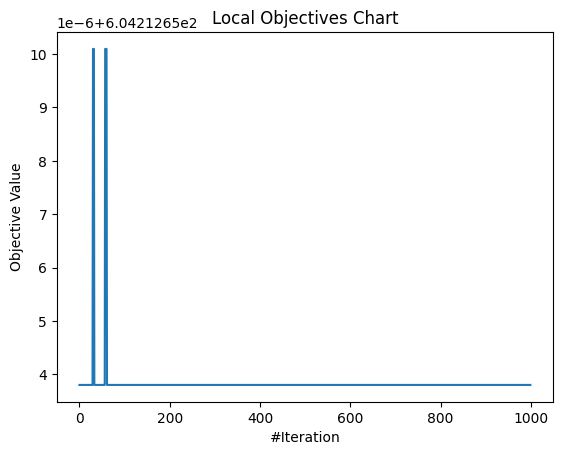

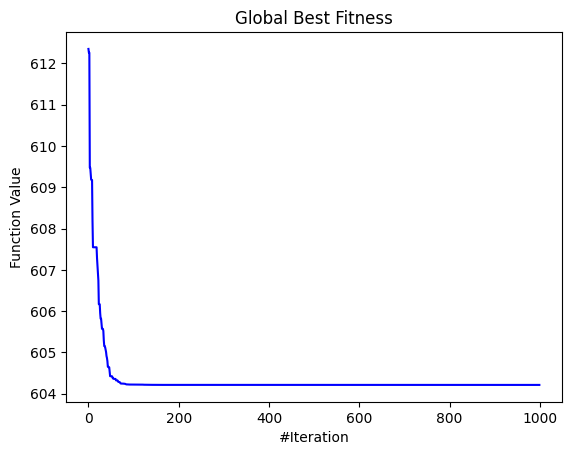

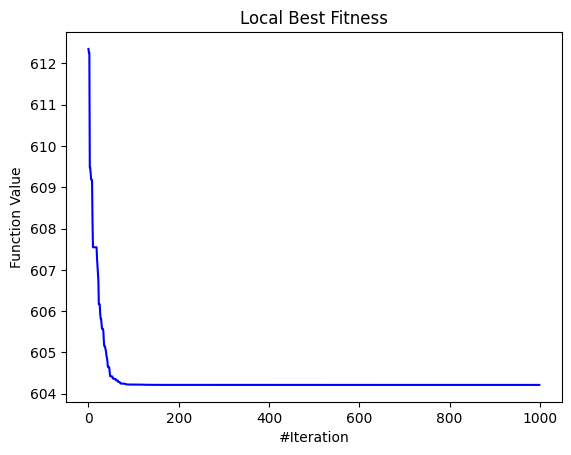

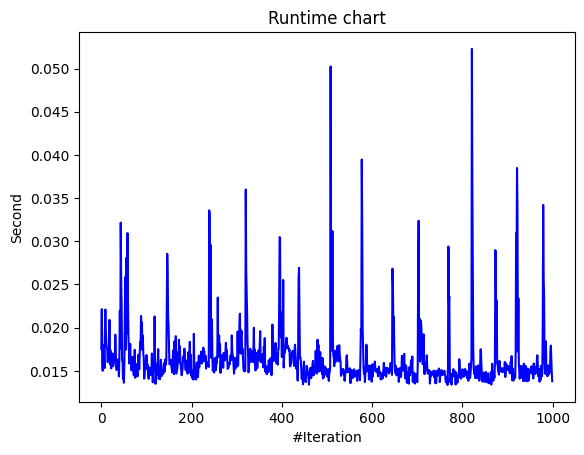

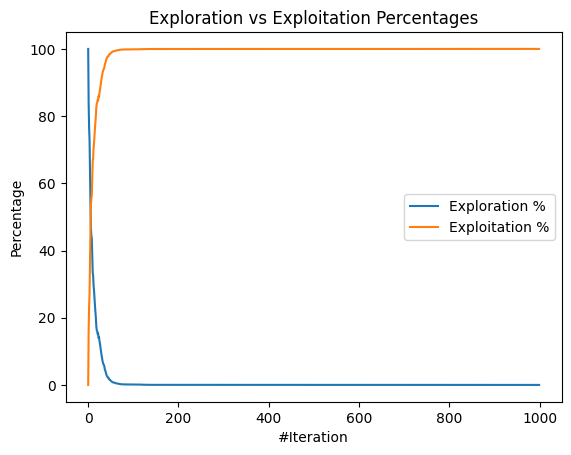

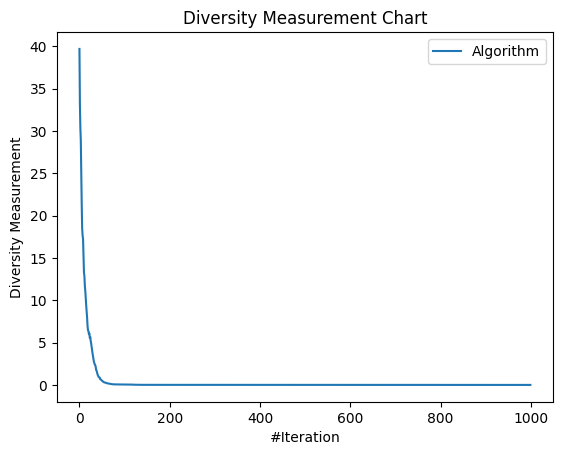

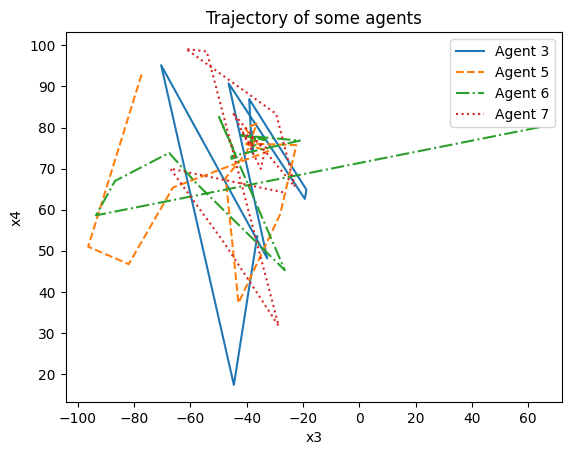

2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 1, Current best: 611.3354792427403, Global best: 611.3354792427403, Runtime: 0.02755 seconds
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 2, Current best: 611.3354792427403, Global best: 611.3354792427403, Runtime: 0.03118 seconds
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 3, Current best: 610.0962455871869, Global best: 610.0962455871869, Runtime: 0.03629 seconds
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 4, Current best: 609.560232969214, Global best: 609.560232969214, Runtime: 0.03608 seconds
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 5, Curr

	Melhor fitness: 604.2126538019751
	Melhor posição: [ 12.61786972  48.16027538 -38.25087767  76.24721891  33.30047568
 -61.34227885 -61.55048378  22.01744252  -3.09171991  21.35371427]

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x0000025B22B5FCB0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x0000025B22BF76D0>, 'minmax': 'min', 'name': 'Config-Config 3', 'verbose': True, 'log_to': 'console', 'save_population': True, 'max_early_stop': 200}


2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 6, Current best: 609.560232969214, Global best: 609.560232969214, Runtime: 0.02974 seconds
2025/05/15 10:36:24 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 7, Current best: 609.560232969214, Global best: 609.560232969214, Runtime: 0.03341 seconds
2025/05/15 10:36:25 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 8, Current best: 608.9176571840599, Global best: 608.9176571840599, Runtime: 0.02894 seconds
2025/05/15 10:36:25 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 9, Current best: 608.115105100931, Global best: 608.115105100931, Runtime: 0.02738 seconds
2025/05/15 10:36:25 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 10, Current best: 608.115105100931, Global best: 608.115105100931, Runtime: 0.02852 seconds
2025/05/15 10:36:25 AM, INFO, me

In [ ]:
def train_model_multiple_runs(model: str = "PSO", problem: str = "f6", num_runs: int = 30):
    """
    Train model multiple times and collect statistics
    """
    all_results = []
    
    for run in tqdm(range(num_runs), desc=f"Running {model} on {problem}"):
        results = train_model(model, problem) 
        all_results.append(results)
    
    return all_results

def create_animation(model: str, problem: str, config_idx: int = 0):
    """
    Create animation of the optimization process
    """
    os.makedirs('results', exist_ok=True)
    
    results = train_model(model, problem)
    if not results:
        print(f"No results found for model {model} on problem {problem}")
        return
    
    result = results[config_idx]
    best_position = result['best_position']
    
    # Since positions_history might not be available, create artificial data
    # to show optimization progress based on fitness history
    num_iterations = len(result['fitness_history'])
    pop_size = result['config']['pop_size']
    
    # Create artificial positions that converge toward the best solution
    positions = []
    for i in range(num_iterations):
        # Progress ratio (0 at start, 1 at end)
        progress = i / (num_iterations - 1) if num_iterations > 1 else 1
        
        # Create random positions that get closer to the best_position as progress increases
        iter_positions = []
        for _ in range(pop_size):
            # Start with a random position within bounds
            random_pos = np.random.uniform(-100, 100, len(best_position))
            # Blend between random and best position based on progress
            pos = (1 - progress) * random_pos + progress * best_position
            # Add some noise that decreases with progress
            noise = np.random.normal(0, 20 * (1 - progress), len(best_position))
            pos = pos + noise
            # Clip to bounds
            pos = np.clip(pos, -100, 100)
            iter_positions.append(pos)
        
        positions.append(np.array(iter_positions))
    
    # Create figure for animation
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Select 2 dimensions for visualization (use the dimensions with largest variance)
    dim_variances = np.var(best_position)
    dim1, dim2 = 0, 1  # Default to first two dimensions
    
    def update(frame_idx):
        if frame_idx >= len(positions):
            return []
            
        ax.clear()
        # Plot current positions
        positions_frame = positions[frame_idx]
        
        # Extract the first two dimensions for plotting
        x_vals = [pos[dim1] for pos in positions_frame]
        y_vals = [pos[dim2] for pos in positions_frame]
        
        ax.scatter(x_vals, y_vals, c='blue', alpha=0.5, label='Particles')
        
        # Plot best position
        ax.scatter(best_position[dim1], best_position[dim2], 
                  c='red', s=100, marker='*', label='Best Position')
        
        ax.set_title(f'Optimization Process - Iteration {frame_idx+1}/{len(positions)}')
        ax.set_xlim([-100, 100])
        ax.set_ylim([-100, 100])
        ax.legend()
        ax.grid(True)
        return []
    
    # Create frames list - use a subset to keep file size reasonable
    total_frames = len(positions)
    step = max(1, total_frames // 50)  # Limit to ~50 frames
    frame_indices = list(range(0, total_frames, step))
    
    # Make sure we include the last frame
    if total_frames - 1 not in frame_indices and total_frames > 0:
        frame_indices.append(total_frames - 1)
    
    if len(frame_indices) == 0:
        print("No frames available for animation")
        return
    
    # Create animation
    anim = FuncAnimation(
        fig, update, frames=frame_indices, 
        interval=200, blit=True
    )
    
    # Save animation
    try:
        output_path = f'results/optimization_{model}_{problem}.gif'
        anim.save(output_path, writer='pillow', fps=5)
        print(f"Animation saved at: {output_path}")
    except Exception as e:
        print(f"Error saving animation: {str(e)}")
        # Show the animation instead
        plt.show()
    
    plt.close()


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def create_animation_static(model: str, problem: str, config_idx: int = 0):
    """
    Create animation using a static image approach that doesn't rely on FuncAnimation
    """
    # Create necessary directories
    os.makedirs('results', exist_ok=True)
    os.makedirs(f'results/{model}', exist_ok=True)
    os.makedirs(f'results/{model}/{problem}', exist_ok=True)
    temp_dir = f'results/{model}/{problem}/frames'
    os.makedirs(temp_dir, exist_ok=True)
    
    print(f"Running {model} on {problem}...")
    
    # For ACO model, we'll need to patch numpy's ptp function
    if model == "ACO":
        # Monkeypatch numpy for backward compatibility
        try:
            if not hasattr(np.ndarray, 'ptp'):
                # Add backward compatibility for ptp
                def _ptp(self, axis=None, out=None, keepdims=False):
                    return np.ptp(self, axis=axis, out=out, keepdims=keepdims)
                np.ndarray.ptp = _ptp
                print("Added compatibility for numpy.ndarray.ptp")
        except Exception as e:
            print(f"Warning: Could not patch numpy: {e}")
    
    # Try to run the model with PSO if ACO fails
    try:
        if model == "PSO":
            results = train_model(model, problem)
        else:
            # For ACO, try to run it but be prepared for failure
            try:
                results = train_model(model, problem)
            except Exception as e:
                print(f"Error running {model}: {e}")
                print("Falling back to PSO...")
                results = train_model("PSO", problem)
                model = "PSO"  # Update model name for output files
    except Exception as e:
        print(f"Failed to run model: {e}")
        return
    
    if not results:
        print(f"No results available for {model} on {problem}")
        return
    
    result = results[config_idx]
    best_position = result['best_position']
    
    # Get fitness history for visualization
    fitness_history = result['fitness_history']
    
    # Create artificial positions if real ones are not available
    position_data = result.get('positions_history')
    if position_data is None or len(position_data) == 0:
        print("No position history available, creating synthetic visualization...")
        
        # Create artificial data
        num_iterations = len(fitness_history)
        pop_size = result['config']['pop_size']
        
        position_data = []
        for i in range(num_iterations):
            # Progress ratio
            progress = min(1.0, i / (num_iterations - 1) if num_iterations > 1 else 1)
            
            # Create particles that converge toward best position
            particles = []
            for _ in range(pop_size):
                # Starting with random positions
                random_pos = np.random.uniform(-100, 100, len(best_position))
                # Linear interpolation toward best position
                pos = (1 - progress) * random_pos + progress * best_position
                # Add noise that decreases over time
                noise = np.random.normal(0, 20 * (1 - progress), len(best_position))
                pos = np.clip(pos + noise, -100, 100)
                particles.append(pos)
            
            position_data.append(particles)
    
    # Create frames
    frame_files = []
    total_frames = len(position_data)
    
    # Determine step to limit total frames (to keep GIF size reasonable)
    step = max(1, total_frames // 30)
    
    print(f"Creating animation frames...")
    
    for i in range(0, total_frames, step):
        if i >= len(position_data):
            break
            
        # Create figure for this frame
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Get current positions
        try:
            positions = position_data[i]
            
            # Plot particles (using first 2 dimensions)
            x = [pos[0] for pos in positions]
            y = [pos[1] for pos in positions]
            
            ax.scatter(x, y, c='blue', alpha=0.5, label='Particles')
            
            # Plot best position found so far
            ax.scatter(best_position[0], best_position[1], 
                      c='red', s=100, marker='*', label='Best Position')
            
            # Add current fitness value
            current_fitness = fitness_history[min(i, len(fitness_history)-1)]
            ax.set_title(f'Optimization Process - Frame {i+1}/{total_frames}\nFitness: {current_fitness:.4f}')
            
            ax.set_xlim([-100, 100])
            ax.set_ylim([-100, 100])
            ax.grid(True)
            ax.legend()
            
            # Save frame
            frame_file = f"{temp_dir}/frame_{i:04d}.png"
            plt.savefig(frame_file)
            frame_files.append(frame_file)
            
        except Exception as e:
            print(f"Error creating frame {i}: {e}")
        
        plt.close(fig)
    
    # Create GIF from frames
    if frame_files:
        try:
            frames = [Image.open(f) for f in frame_files]
            
            if frames:
                output_path = f'results/{model}/{problem}/optimization.gif'
                
                # Save as GIF
                frames[0].save(
                    output_path,
                    format='GIF',
                    append_images=frames[1:],
                    save_all=True,
                    duration=200,  # ms between frames
                    loop=0  # loop forever
                )
                
                print(f"Animation saved to {output_path}")
                
                # Clean up temporary files
                for f in frame_files:
                    os.remove(f)
                
                return output_path
                
        except Exception as e:
            print(f"Error creating GIF: {e}")
    else:
        print("No frames were created, animation could not be generated")
    
    return None

# Função para iniciar a análise com foco apenas na animação
def run_animation_only():
    models = ["PSO"]  # Remove ACO if it continues to cause problems
    problems = ["f1", "f6"]
    
    for model in models:
        for problem in problems:
            print(f"\n--------------------")
            print(f"Creating animation for {model} on {problem}")
            print(f"--------------------\n")
            
            try:
                output_path = create_animation_static(model, problem)
                if output_path:
                    print(f"Successfully created animation at {output_path}")
                else:
                    print(f"Failed to create animation for {model} on {problem}")
            except Exception as e:
                print(f"Error during animation creation: {e}")


def analyze_results(all_results, model: str, problem: str):
    """
    Analyze results from multiple runs and generate statistical visualizations
    """
    # Create results directory if it doesn't exist
    os.makedirs('results', exist_ok=True)
    
    # Prepare data for analysis
    stats_data = []
    for run_idx, run_results in enumerate(all_results):
        for config_result in run_results:
            stats_data.append({
                'Run': run_idx,
                'Config': config_result['config']['name'],
                'Epoch': config_result['config']['epoch'],
                'Pop_Size': config_result['config']['pop_size'],
                'Best_Fitness': config_result['best_fitness'],
                'Final_Exploration': np.mean(config_result['exploration_history'][-100:]),
                'Final_Exploitation': np.mean(config_result['exploitation_history'][-100:])
            })
    
    df = pd.DataFrame(stats_data)
    
    # 1. Box plots for best fitness by configuration
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Config', y='Best_Fitness')
    plt.title(f'Distribution of Best Fitness - {model} - {problem}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'results/{model}/{problem}/fitness_boxplot.png')
    plt.close()
    
    # 2. Statistical summary
    stats_summary = df.groupby('Config')['Best_Fitness'].agg([
        'mean', 'std', 'median', 'min', 'max'
    ]).round(4)
    
    # Save statistical summary to CSV
    stats_summary.to_csv(f'results/{model}/{problem}/stats_summary.csv')
    
    # 3. Convergence plots with confidence intervals
    plt.figure(figsize=(12, 6))
    
    # Get unique configurations
    configs = df['Config'].unique()
    
    for config in configs:
        # Get all fitness histories for this configuration
        fitness_histories = []
        for run_results in all_results:
            for result in run_results:
                if result['config']['name'] == config:
                    fitness_histories.append(result['fitness_history'])
        
        # Convert to numpy array for easier calculation
        fitness_histories = np.array(fitness_histories)
        
        # Calculate mean and std across all runs
        mean_fitness = np.mean(fitness_histories, axis=0)
        std_fitness = np.std(fitness_histories, axis=0)
        
        # Plot mean with confidence interval
        x = np.arange(len(mean_fitness))
        plt.plot(x, mean_fitness, label=f'{config} (mean)')
        plt.fill_between(x, 
                        mean_fitness - std_fitness,
                        mean_fitness + std_fitness,
                        alpha=0.2)
    
    plt.title(f'Convergence with Confidence Intervals - {model} - {problem}')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'results/{model}/{problem}/convergence_ci.png')
    plt.close()
    
    # 4. Additional statistical analysis
    # Create a more detailed statistical summary
    detailed_stats = df.groupby('Config').agg({
        'Best_Fitness': ['mean', 'std', 'median', 'min', 'max', 
                        lambda x: stats.skew(x),  # Skewness
                        lambda x: stats.kurtosis(x)],  # Kurtosis
        'Final_Exploration': 'mean',
        'Final_Exploitation': 'mean'
    }).round(4)
    
    # Rename columns for clarity
    detailed_stats.columns = ['_'.join(col).strip() for col in detailed_stats.columns.values]
    detailed_stats.to_csv(f'results/{model}/{problem}/detailed_stats.csv')
    
    # 5. Plot exploration vs exploitation ratio
    plt.figure(figsize=(12, 6))
    for config in configs:
        config_data = df[df['Config'] == config]
        ratio = config_data['Final_Exploration'] / config_data['Final_Exploitation']
        sns.kdeplot(data=ratio, label=config)
    
    plt.title(f'Distribution of Exploration/Exploitation Ratio - {model} - {problem}')
    plt.xlabel('Exploration/Exploitation Ratio')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'results/{model}/{problem}/exploration_ratio.png')
    plt.close()
    
    return stats_summary, detailed_stats

def run_complete_analysis(save_only_animation: bool = False):
    try:
        models = ["ACO", 
                  "PSO"]
        problems = ["f1", "f6"]
        
        for model in models:
            for problem in problems:
                print(f"\nAnalyzing {model} on {problem}")
                if save_only_animation:
                    create_animation_static(model, problem)
                else:
                    all_results = train_model_multiple_runs(model, problem, num_runs=30)
                    stats_summary, detailed_stats = analyze_results(all_results, model, problem)
                    print("\nBasic Statistical Summary:")
                    print(stats_summary)
                    print("\nDetailed Statistical Analysis:")
                    print(detailed_stats)
    except Exception as e:
        print(f"Error: {e}")
            
            
run_complete_analysis(save_only_animation=True)